# Comparison between normal and log-normal sampling: U-235

In [1]:
import sandy

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np

In [4]:
nsmp = 1e5

In [5]:
cov = sandy.get_endf6_file("jeff_33", "xs", 922350).get_errorr(err=1, errorr33_kws=dict(ign=19), chi=False, mubar=False, nubar=False)["errorr33"].get_cov()
c = cov.data.values

INFO:  Zero or no temperature was requested, NJOY processing will stop after RECONR.
    If you want to process 0K cross sections use `temperature=0.1`.
    



 njoy 2016.74  12Jan24                                       01/18/24 18:43:23
 *****************************************************************************

 moder...                                                                 0.0s

 reconr...                                                                0.1s

 ---message from rdf2bw---calculation of angular distribution not installed.



 moder...                                                                 5.9s



 errorr...                                                                6.4s

 ---message from errorr---neutron group structure option 19 has been
                          changed, you may want to use -1 instead

 processing mat  9228
 ---------------------
  92-U -235 IRSN-CEA   EVAL-DEC14 IRSN-CEA DAM/DEN COLLAB.           

 covariances calculated for  8 reactions and   33 groups                  6.4s
                                                                          6.5s
 *****************************************************************************


Check 2-norm to see if sample covariance and sample mean match the original covariance and mean

In [6]:
s_ln = cov.sampling(nsmp, pdf="lognormal")
c_ln = s_ln.get_cov().values
m_ln = s_ln.get_mean().values

print(
    np.linalg.norm(c_ln - c) / np.linalg.norm(c) * 100,
    np.linalg.norm(m_ln - np.ones(m_ln.size)) / np.linalg.norm(np.ones(m_ln.size)) * 100,
)

s_n= cov.sampling(nsmp, pdf="normal")
c_n = s_n.get_cov().values
m_n = s_n.get_mean().values

print(
    np.linalg.norm(c_n - c) / np.linalg.norm(c) * 100,
    np.linalg.norm(m_n - np.ones(m_n.size)) / np.linalg.norm(np.ones(m_ln.size)) * 100,
)

0.5337551352793068 0.011007498585359323


0.4780894317611679 0.01794006741059779


## Plot correlation

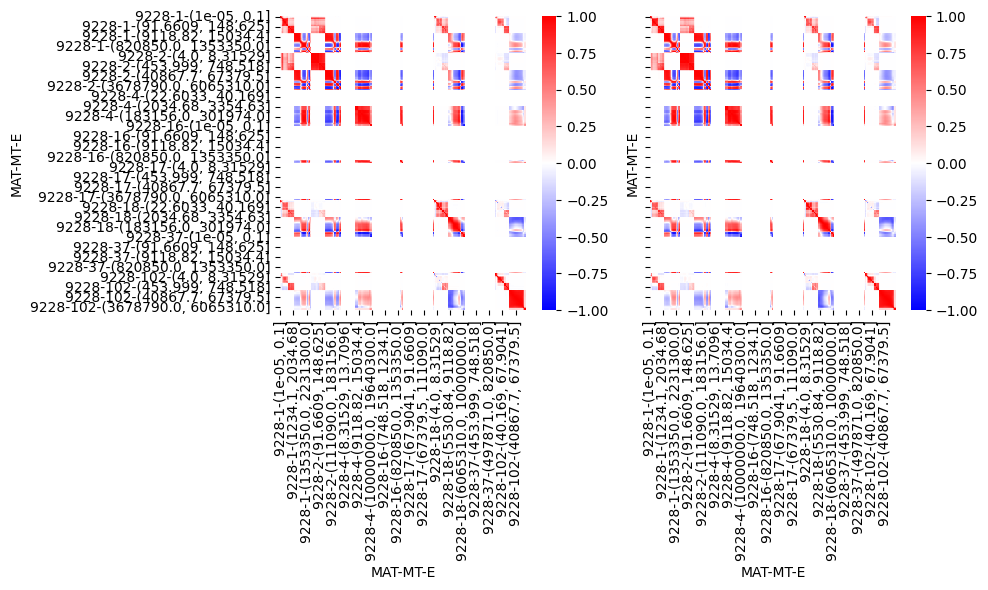

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6), dpi=100, sharex=True, sharey=True)

cc = s_n.get_corr()
sns.heatmap(cc, vmin=-1, vmax=1, cmap='bwr', ax=axs[0])

cc = s_ln.get_corr()
sns.heatmap(cc, vmin=-1, vmax=1, cmap='bwr', ax=axs[1])

fig.tight_layout()

## Plot stdev

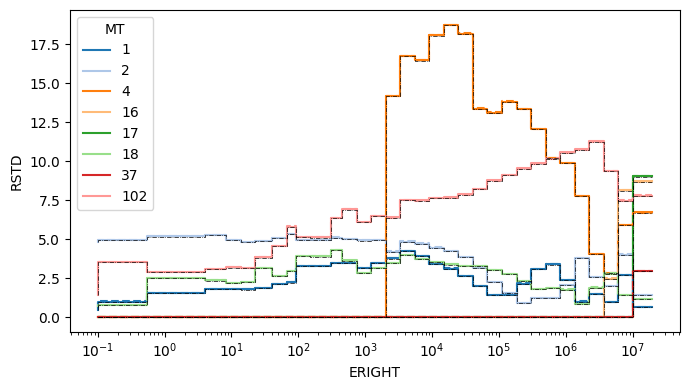

In [8]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)

s = s_n.get_rstd().reset_index()
s["MT"] = s["MT"].astype("category")
s["ERIGHT"] = [x.right for x in s.E]
s["RSTD"] *= 100
sns.lineplot(data=s, x="ERIGHT", y="RSTD", hue="MT", palette="tab20", ax=ax, drawstyle="steps-pre")

s = s_ln.get_rstd().reset_index()
s["MT"] = s["MT"].astype("category")
s["ERIGHT"] = [x.right for x in s.E]
s["RSTD"] *= 100
sns.lineplot(data=s, x="ERIGHT", y="RSTD", hue="MT", palette="tab20", ax=ax, drawstyle="steps-pre", legend=None, ls="--")

s = cov.get_std().reset_index()
s["MT"] = s["MT"].astype("category")
s["ERIGHT"] = [x.right for x in s.E]
s["STD"] *= 100
sns.lineplot(data=s, x="ERIGHT", y="STD", hue="MT", palette=['k'] * s.MT.unique().size, ax=ax, drawstyle="steps-pre", legend=None, ls="-.", lw=.5)

ax.set(xscale="log")

fig.tight_layout()

## Plot mean

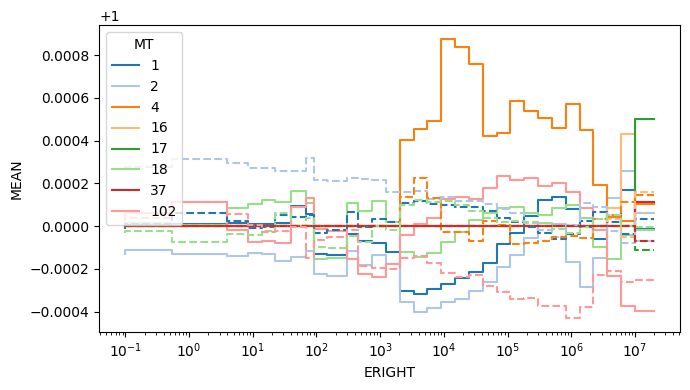

In [9]:
fig, ax = plt.subplots(figsize=(7, 4), dpi=100)

s = s_n.get_mean().reset_index()
s["MT"] = s["MT"].astype("category")
s["ERIGHT"] = [x.right for x in s.E]
sns.lineplot(data=s, x="ERIGHT", y="MEAN", hue="MT", palette="tab20", ax=ax, drawstyle="steps-pre")

s = s_ln.get_mean().reset_index()
s["MT"] = s["MT"].astype("category")
s["ERIGHT"] = [x.right for x in s.E]
sns.lineplot(data=s, x="ERIGHT", y="MEAN", hue="MT", palette="tab20", ax=ax, drawstyle="steps-pre", legend=None, ls="--")

ax.set(xscale="log")

fig.tight_layout()